# [9665] Homework 1 : NLTK
Data file:
* https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9665/main/data/Womens_clothing_ECommerce_reviews_5k.csv
  * Independent variables
    * Title: String variable for the title of the review
    * Review Text: String variable for the review body
    * Division Name: Categorical name of the product high level division
    * Department Name: Categorical name of the product department name
    * Class Name: Categorical name of the product class name

## Homework Submission Rules (for all Homeworks)
* Homework is due by 6:05 PM on the due date
  * No late submission will be accepted
* Verify that you are submitting the correct homework file in the correct format
* Submit a completed and fully executed Jupyter notebook
  * No other format will be accepted or graded
* Jupyter notebook file naming convention
  * LastName_FirstName_HwY.pdf  [Replace Y with the Homework #]
    * 0.5 points deducted for submitting homework not complying with file naming convention
* Before submission, execute "Kernel -> Restart Kernel and Run All Cells"
  * 0.5 points deducted for not submitting a cleanly executed notebook

## Homework 1 Requirements
* Load data into dataframe
* Perform appropriate text preprocessing & text vectorization
* Generate target variable 'Generated_Sentiment' from the independent variables
* Train SVC model with the objective that >50% of each class is predicted correctly
* Display:
  * model accuracy
  * classification report
  * confusion matrix

In [ ]:
from datetime import datetime
print(f'Run time: {datetime.now().strftime("%D %T")}')

Run time: 02/26/25 00:20:35


### Import libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

In [ ]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('vader_lexicon')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### Load data

In [ ]:
# Load data file Womens_clothing_ECommerce_reviews_5k.csv into dataframe
df=pd.read_csv('https://raw.githubusercontent.com/vjavaly/Baruch-CIS-9665/main/data/Womens_clothing_ECommerce_reviews_5k.csv')

### Examine data

In [ ]:
pd.set_option('display.max_colwidth', None)

In [ ]:
df.shape

(5000, 5)

In [ ]:
# Display a random sample of 5 rows from dataframe
df.sample(5)

,Title,Review Text,Division Name,Department Name,Class Name
215,Not for every body shape,"This may be lovely on some people but it didn't work on me at all. i thought it would have some swing to it but the bottom hem was tight. if i had gone up a size, the top would have been huge. the bib wasn't flattering on me and it's also quite sheer. too bad because the print is great. maybe if you're athletic with slim hips you can manage it. i think if you are busty this could look like maternity wear on you. back it went, sadly.",General,Tops,Blouses
422,Nice but yellowy,"This is a lovely skirt that fits well, but it is much more of a yellowy cream color than white. also, it felt very static-y.",General Petite,Bottoms,Skirts
2653,Not as pictured,"I was so looking forward to wearing these pants on an upcoming trip. i already had my outfits planned! when these pants arrived, however, they were very different from those shown in the pictures online. firstly, the pants are, in actuality, quite cropped. i am 5'9-- the model in the pictures is at least that height, if not taller-- and the hems were several inches above my ankles. secondly, the pants appear to be an even wider cut than what's shown, although the width of the pant legs may have",General Petite,Bottoms,Pants
191,"Pretty top, very comfortable","I bought this top during the extra 30% off sale, so the price was definitely worth it and i know i'll get a lot of wear out it. i bought the grey and the lace isn't too revealing, but just enough for me to want to wear a cami underneath, especially at work. i'm normally a small/4 in retailer brands, but i bought a xs and it fits great, so it does run a little large.",General,Tops,Knits
3692,No shape,"Just got this in - love the color and fabric, but it has no shape on me. i thought i'd wear a large because i have a 36ddd chest, but i should have gotten a medium, at the largest. also, even if it did fit, it came with a stain resembling toothpaste right in front. i'll be returning.",General Petite,Tops,Knits


### Prepare data - perform necessary text preprocessing

In [ ]:
df.isnull().sum()

,0
Title,0
Review Text,0
Division Name,0
Department Name,0
Class Name,0


In [ ]:
#clean review text
import string
df['review_text_clean']=df['Review Text'].str.lower()

df['review_text_clean']=df['review_text_clean'].str.translate(str.maketrans(" "," ",string.punctuation))

df['review_text_clean']=df['review_text_clean'].str.replace('\s+', ' ')

df.head()

,Title,Review Text,Division Name,Department Name,Class Name,review_text_clean
0,Waist gets baggy with wear,"I really liked these jeans initially, but by the end of the day the waist is really baggy. the fabric stretches with wear and takes a wash to get back to its original shape.",General,Bottoms,Jeans,i really liked these jeans initially but by the end of the day the waist is really baggy the fabric stretches with wear and takes a wash to get back to its original shape
1,So long!!,"I am of average height, but these pants are so long!! i considered altering them because i like the print, but i don't think it's worth the effort for workout attire so they're going back. shame!!",Initmates,Intimate,Lounge,i am of average height but these pants are so long i considered altering them because i like the print but i dont think its worth the effort for workout attire so theyre going back shame
2,Slip is too small...,"Dress is pretty, i was disappointed by the slip which is too small like previous customer. i am an inch taller than the model and i feel more comfortable it being a tunic with leggings. nice but not nice enough to keep, i am returning. :(",General,Dresses,Dresses,dress is pretty i was disappointed by the slip which is too small like previous customer i am an inch taller than the model and i feel more comfortable it being a tunic with leggings nice but not nice enough to keep i am returning
3,Didn't look good on me,Thought i would try this as other reviewers loved it and it's out of my comfort zone. it looked like a poncho with a baggy tank underneath. not worth the price. the tassels looked a bit worn as well.,General,Tops,Knits,thought i would try this as other reviewers loved it and its out of my comfort zone it looked like a poncho with a baggy tank underneath not worth the price the tassels looked a bit worn as well
4,Dress,"I love the look of this dress but the length feels a little awkward which might be my height (5'4""). i'm thinking about having it altered, not sure if i will do that or return it. i love the colors and the back cut out, it may be a better length for taller individuals.",General Petite,Dresses,Dresses,i love the look of this dress but the length feels a little awkward which might be my height 54 im thinking about having it altered not sure if i will do that or return it i love the colors and the back cut out it may be a better length for taller individuals


In [ ]:
sw = set(stopwords.words("english"))
df['review_text_clean']=df['review_text_clean'].apply(lambda x:" ".join(x for x in str(x).split() if x not in sw))
df.head()

,Title,Review Text,Division Name,Department Name,Class Name,review_text_clean
0,Waist gets baggy with wear,"I really liked these jeans initially, but by the end of the day the waist is really baggy. the fabric stretches with wear and takes a wash to get back to its original shape.",General,Bottoms,Jeans,really liked jeans initially end day waist really baggy fabric stretches wear takes wash get back original shape
1,So long!!,"I am of average height, but these pants are so long!! i considered altering them because i like the print, but i don't think it's worth the effort for workout attire so they're going back. shame!!",Initmates,Intimate,Lounge,average height pants long considered altering like print dont think worth effort workout attire theyre going back shame
2,Slip is too small...,"Dress is pretty, i was disappointed by the slip which is too small like previous customer. i am an inch taller than the model and i feel more comfortable it being a tunic with leggings. nice but not nice enough to keep, i am returning. :(",General,Dresses,Dresses,dress pretty disappointed slip small like previous customer inch taller model feel comfortable tunic leggings nice nice enough keep returning
3,Didn't look good on me,Thought i would try this as other reviewers loved it and it's out of my comfort zone. it looked like a poncho with a baggy tank underneath. not worth the price. the tassels looked a bit worn as well.,General,Tops,Knits,thought would try reviewers loved comfort zone looked like poncho baggy tank underneath worth price tassels looked bit worn well
4,Dress,"I love the look of this dress but the length feels a little awkward which might be my height (5'4""). i'm thinking about having it altered, not sure if i will do that or return it. i love the colors and the back cut out, it may be a better length for taller individuals.",General Petite,Dresses,Dresses,love look dress length feels little awkward might height 54 im thinking altered sure return love colors back cut may better length taller individuals


In [ ]:
lem = WordNetLemmatizer()
df['review_text_clean'] = df['review_text_clean'].apply(lambda x: ' '.join([lem.lemmatize(word) for word in str(x).split()]))
df.head()

,Title,Review Text,Division Name,Department Name,Class Name,review_text_clean
0,Waist gets baggy with wear,"I really liked these jeans initially, but by the end of the day the waist is really baggy. the fabric stretches with wear and takes a wash to get back to its original shape.",General,Bottoms,Jeans,really liked jean initially end day waist really baggy fabric stretch wear take wash get back original shape
1,So long!!,"I am of average height, but these pants are so long!! i considered altering them because i like the print, but i don't think it's worth the effort for workout attire so they're going back. shame!!",Initmates,Intimate,Lounge,average height pant long considered altering like print dont think worth effort workout attire theyre going back shame
2,Slip is too small...,"Dress is pretty, i was disappointed by the slip which is too small like previous customer. i am an inch taller than the model and i feel more comfortable it being a tunic with leggings. nice but not nice enough to keep, i am returning. :(",General,Dresses,Dresses,dress pretty disappointed slip small like previous customer inch taller model feel comfortable tunic legging nice nice enough keep returning
3,Didn't look good on me,Thought i would try this as other reviewers loved it and it's out of my comfort zone. it looked like a poncho with a baggy tank underneath. not worth the price. the tassels looked a bit worn as well.,General,Tops,Knits,thought would try reviewer loved comfort zone looked like poncho baggy tank underneath worth price tassel looked bit worn well
4,Dress,"I love the look of this dress but the length feels a little awkward which might be my height (5'4""). i'm thinking about having it altered, not sure if i will do that or return it. i love the colors and the back cut out, it may be a better length for taller individuals.",General Petite,Dresses,Dresses,love look dress length feel little awkward might height 54 im thinking altered sure return love color back cut may better length taller individual


In [ ]:
import numpy as np
word_distro = pd.Series(' '.join(df['review_text_clean']).split()).value_counts()
print('pre-adjust',len(word_distro))
rw = word_distro[word_distro <= 1]
print('post-adjust',len(rw))
df['review_text_clean'] = df['review_text_clean'].apply(lambda x: " ".join(x for x in x.split() if x not in rw))
df.head()

pre-adjust 8319
post-adjust 4145


,Title,Review Text,Division Name,Department Name,Class Name,review_text_clean
0,Waist gets baggy with wear,"I really liked these jeans initially, but by the end of the day the waist is really baggy. the fabric stretches with wear and takes a wash to get back to its original shape.",General,Bottoms,Jeans,really liked jean initially end day waist really baggy fabric stretch wear take wash get back original shape
1,So long!!,"I am of average height, but these pants are so long!! i considered altering them because i like the print, but i don't think it's worth the effort for workout attire so they're going back. shame!!",Initmates,Intimate,Lounge,average height pant long considered altering like print dont think worth effort workout attire theyre going back shame
2,Slip is too small...,"Dress is pretty, i was disappointed by the slip which is too small like previous customer. i am an inch taller than the model and i feel more comfortable it being a tunic with leggings. nice but not nice enough to keep, i am returning. :(",General,Dresses,Dresses,dress pretty disappointed slip small like previous customer inch taller model feel comfortable tunic legging nice nice enough keep returning
3,Didn't look good on me,Thought i would try this as other reviewers loved it and it's out of my comfort zone. it looked like a poncho with a baggy tank underneath. not worth the price. the tassels looked a bit worn as well.,General,Tops,Knits,thought would try reviewer loved comfort zone looked like poncho baggy tank underneath worth price tassel looked bit worn well
4,Dress,"I love the look of this dress but the length feels a little awkward which might be my height (5'4""). i'm thinking about having it altered, not sure if i will do that or return it. i love the colors and the back cut out, it may be a better length for taller individuals.",General Petite,Dresses,Dresses,love look dress length feel little awkward might height 54 im thinking altered sure return love color back cut may better length taller individual


In [ ]:
# Display a random sample of 5 rows from updated dataframe
df.sample(5)

,Title,Review Text,Division Name,Department Name,Class Name,review_text_clean
3678,"Loved this, then washed it twice and it fell apart","I loved this dress from the moment i tried it on. so flattering to my postpartum body without being a huge tent. soft fabric, and for a white/lightly striped dress, not sheer. i'm bummed because after washing only twice (followed the instructions to wash) on gentle cycle and low tumble dry, holes started appearing everywhere, both on the cream ribbed hem in the front bottom and all across the chest, in the white part of the fabric only (it looks like the black stripes are holding the holes toget",General Petite,Intimate,Lounge,loved dress moment tried flattering postpartum body without huge tent soft fabric striped dress sheer im bummed washing twice followed instruction wash gentle cycle low tumble dry hole started appearing everywhere cream ribbed hem front bottom across chest white part fabric look like black stripe holding hole toget
4572,Cheaply made,"The cut and color of the dress is awesome. however, the biggest flaw is the zipper. i only got to wear this dress once until the zipper broke..sad day especially at the price. there also were a number of loose threads. i recommend waiting until it goes on sale. you'll want the extra money for a tailor to fix that zipper.",General Petite,Dresses,Dresses,cut color dress awesome however biggest flaw zipper got wear dress zipper day especially price also number loose thread recommend waiting go sale youll want extra money tailor fix zipper
370,Great t,"Love this t-shirt! i live in miami and have a 5 month old so i practically live in shorts and t-shirts, and this shirt fits beautifully and adds a little extra pop to your everyday t. love the material too!",General Petite,Tops,Knits,love tshirt live 5 month old practically live short tshirts shirt fit beautifully add little extra pop everyday love material
2971,Poor quality,"Very disappointed. ordered two sizes, the fraying of the embroidery was so bad on one of the dresses i wouldn't have worn it and the zipper was sticking. the second dress had fraying and loose threads as well and the seams at the shoulders were not properly sewn which made the lace at the neckline completely crooked. some of these issues would maybe be acceptable if the dress was under $100 but at $228 they are not. returning both sizes.",General,Dresses,Dresses,disappointed ordered two size fraying embroidery bad one dress wouldnt worn zipper sticking second dress fraying loose thread well seam shoulder properly sewn made lace neckline completely crooked issue would maybe acceptable dress 100 returning size
1327,Gorgeous fabric,"The fabric is so beautiful that i am tempted to buy in a large size and have re-made. the waist is tiny. the hips are wide. when it goes to half price, i may be tempted to take it to my favorite alterations lady. the fabric is that exceptionally beautiful.",General,Bottoms,Skirts,fabric beautiful tempted buy large size waist tiny hip wide go half price may tempted take favorite alteration lady fabric exceptionally beautiful


### Generate sentiment from data

In [ ]:
from sklearn.preprocessing import LabelEncoder
sia = SentimentIntensityAnalyzer()
df['polarity_score']=df["review_text_clean"].apply(lambda x: sia.polarity_scores(x)["compound"])
df["polarity_label"] = df["polarity_score"].apply(lambda x: "pos" if x > .5 else "neg")
df["Generated_Sentiment"] = LabelEncoder().fit_transform(df["polarity_label"])
df.sample(5)


,Title,Review Text,Division Name,Department Name,Class Name,review_text_clean,polarity_score,polarity_label,Generated_Sentiment
982,"Bought for my sister, she loves it!","This was a christmas gift to my sister. she liked it so much she wore it the day after opening it. very cute design, lovely deep red color. only thing to look out for is the potential of fabric to snag - looks like it may do so easily if wearing long jewelry. may run a bit large, but the medium for her well (slightly loose fitting garment). she is 5'7 and would probably wear a large in a typical shirt.",General,Tops,Fine gauge,christmas gift sister liked much wore day opening cute design lovely deep red color thing look potential fabric snag look like may easily wearing long jewelry may run bit large medium well slightly loose fitting garment 57 would probably wear large typical shirt,0.9476,pos,1
1926,Not for me,The quality of this shirt is great and the colors are pretty. it just made me look super wide. i feel like the waist is too high - not quite empire and not quite at the waist. it just wasn't going to work for my body. maybe a different size would work but i don't like it enough to try.,General,Tops,Blouses,quality shirt great color pretty made look super wide feel like waist high quite empire quite waist wasnt going work body maybe different size would work dont like enough try,0.9451,pos,1
2320,Not impressed,"Cute design. runs big in neckline, falls off shoulder exposing bra straps. fabric is very thin. sloppy look on short petite frame. 5'1"" 142lbs 34-36 c/d. purchased a medium. haven't washed it yet, but the fabric doesn't look like it will hold up well. i have kept it to wear as a sleep shirt with thin gray sleep sweats.",General,Tops,Knits,cute design run big neckline fall shoulder exposing bra strap fabric thin sloppy look short petite frame 51 cd purchased medium havent washed yet fabric doesnt look like hold well kept wear sleep shirt thin gray sleep sweat,0.2240,neg,0
3589,Too many pleats,There were just too many pleats to this thing. it was not flattering. it looks fantastic on this model but not on me. oh well.,General Petite,Dresses,Dresses,many pleat thing flattering look fantastic model oh well,0.7906,pos,1
1484,Not so great,"I read the reviews and everyone loved them so ordered them online. for me, they are a no. i thought the fabric was cheap and the quality not so great compared to typical retailer items.",General Petite,Bottoms,Pants,read review everyone loved ordered online thought fabric cheap quality great compared typical retailer item,0.8402,pos,1


### Vectorize data

In [ ]:
X = df[['review_text_clean']]
y = df['Generated_Sentiment']

In [ ]:
ntfidf_converter = TfidfVectorizer(max_features=100000, ngram_range=(1,1))
X_ngram = ntfidf_converter.fit_transform(X['review_text_clean']).toarray()
X_ngram.shape

(5000, 4146)

### Split data into training and test sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ngram, y, test_size=.25, random_state=42)

### Train SVC model with default hyperparameters

In [ ]:
classifier=SVC()
classifier.fit(X_train,y_train)

SVC()

### Evaluate SVC model with default hyperparameters

In [ ]:
# Display accuracy
from sklearn.metrics import accuracy_score
model_preds = classifier.predict(X_test)
svc_acc = accuracy_score(y_test, model_preds)
print(f"SVC score: {round((svc_acc * 100), 3)}%")

SVC score: 80.24%


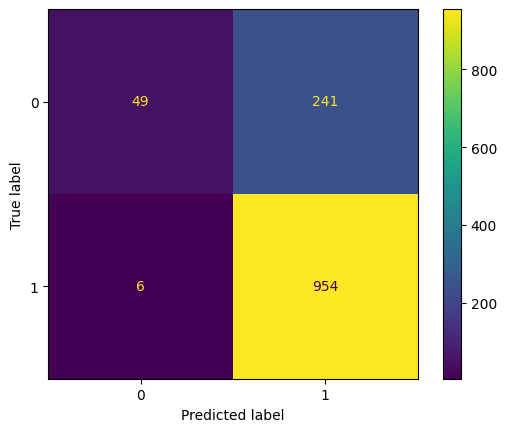

In [ ]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cf_matrix = confusion_matrix(y_test, model_preds)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=classifier.classes_)
conf_matrix.plot()
plt.show()

### Re-train SVC model with the objective that >50% of the predictions for each class is predicted correctly
- Update hyperparameters appropriately to achieve the stated objective


In [ ]:
classifier=SVC(kernel='linear',gamma='auto')
classifier.fit(X_train,y_train)

SVC(gamma='auto', kernel='linear')

### Evaluate updated SVC model

In [ ]:
# Display accuracy
model_preds = classifier.predict(X_test)
svc_acc = accuracy_score(y_test, model_preds)
print(f"SVC score: {round((svc_acc * 100), 3)}%")

SVC score: 84.0%


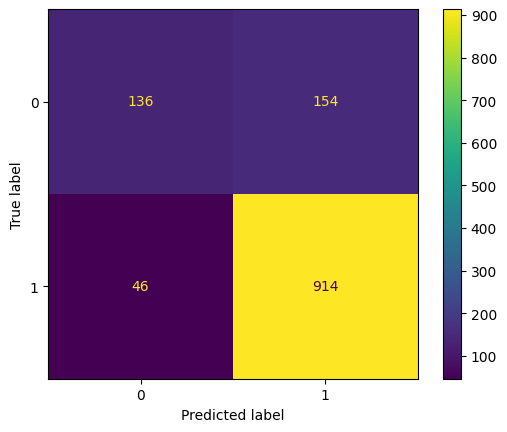

In [ ]:
# Display the confusion matrix
cf_matrix = confusion_matrix(y_test, model_preds)
conf_matrix = ConfusionMatrixDisplay(confusion_matrix=cf_matrix, display_labels=classifier.classes_)
conf_matrix.plot()
plt.show()